In [1]:
import pandas as pd 
import numpy as np
import nltk

In [2]:
data = pd.read_csv("./English_Crises/english.csv")

In [3]:
data.head()

,Unnamed: 0,Tweet ID,Tweet Text,Information Source,Information Type,Informativeness
0,0,2.110407e+17,#Intern #US #TATTOO #Wisconsin #Ohio #NC #PA #...,Not labeled,Not labeled,Not related
1,1,2.111117e+17,RT @Jack4Ward: Get in on the fun every Thursda...,Not labeled,Not labeled,Not related
2,2,2.111572e+17,Welcome to our newest STUDENTathlete- Reagan B...,Not labeled,Not labeled,Not related
3,3,2.111626e+17,Denver Post: #Colorado governor signs bill cre...,Not labeled,Not labeled,Not related
4,4,2.112170e+17,Pretty sure I'm going to live in Manitou Sprin...,Not labeled,Not labeled,Not related


In [4]:
data.tail()

,Unnamed: 0,Tweet ID,Tweet Text,Information Source,Information Type,Informativeness
10674,10674,3.345096e+17,@leavingthedock_ I'm in west Texas right now w...,Not labeled,Not labeled,Not related
10675,10675,3.345210e+17,how many fertilizer plants are there in texas?...,Outsiders,Infrastructure and utilities,Related - but not informative
10676,10676,3.346833e+17,RT @SEC_Logo: #SEC West Baseball Standings: 1....,Not labeled,Not labeled,Not related
10677,10677,3.347545e+17,RT @mountain_goats: Quick somebody ask me are ...,Not labeled,Not labeled,Not related
10678,10678,3.347684e+17,All Hail West Texas,Not labeled,Not labeled,Not related


In [5]:
data = data.drop(["Unnamed: 0","Tweet ID"],axis=1)

In [6]:
data.head()

,Tweet Text,Information Source,Information Type,Informativeness
0,#Intern #US #TATTOO #Wisconsin #Ohio #NC #PA #...,Not labeled,Not labeled,Not related
1,RT @Jack4Ward: Get in on the fun every Thursda...,Not labeled,Not labeled,Not related
2,Welcome to our newest STUDENTathlete- Reagan B...,Not labeled,Not labeled,Not related
3,Denver Post: #Colorado governor signs bill cre...,Not labeled,Not labeled,Not related
4,Pretty sure I'm going to live in Manitou Sprin...,Not labeled,Not labeled,Not related


In [7]:
data.tail()

,Tweet Text,Information Source,Information Type,Informativeness
10674,@leavingthedock_ I'm in west Texas right now w...,Not labeled,Not labeled,Not related
10675,how many fertilizer plants are there in texas?...,Outsiders,Infrastructure and utilities,Related - but not informative
10676,RT @SEC_Logo: #SEC West Baseball Standings: 1....,Not labeled,Not labeled,Not related
10677,RT @mountain_goats: Quick somebody ask me are ...,Not labeled,Not labeled,Not related
10678,All Hail West Texas,Not labeled,Not labeled,Not related


In [8]:
data["Information Source"].unique()

array(['Not labeled', 'Media', 'Government', 'Outsiders', 'NGOs',
       'Business', 'Eyewitness', 'Not applicable'], dtype=object)

In [9]:
data["Information Type"].unique()

array(['Not labeled', 'Other Useful Information', 'Caution and advice',
       'Affected individuals', 'Infrastructure and utilities',
       'Donations and volunteering', 'Sympathy and support',
       'Not applicable'], dtype=object)

In [10]:
data["Informativeness"].unique()

array(['Not related', 'Not applicable', 'Related and informative',
       'Related - but not informative'], dtype=object)

In [11]:
import re
def remove_RT(string):
    return re.sub(r'RT.*?: ', '', string)

In [12]:
def remove_hyperlinks(string):
    string = re.sub(r'http?:\/\/.*[\r\n]*', '', string)
    string = re.sub(r'https?:\/\/.*[\r\n]*', '', string)
    return string

In [13]:
data["Removed RT"] = data["Tweet Text"].apply(remove_RT)

In [14]:
data

,Tweet Text,Information Source,Information Type,Informativeness,Removed RT
0,#Intern #US #TATTOO #Wisconsin #Ohio #NC #PA #...,Not labeled,Not labeled,Not related,#Intern #US #TATTOO #Wisconsin #Ohio #NC #PA #...
1,RT @Jack4Ward: Get in on the fun every Thursda...,Not labeled,Not labeled,Not related,Get in on the fun every Thursday with the @csi...
2,Welcome to our newest STUDENTathlete- Reagan B...,Not labeled,Not labeled,Not related,Welcome to our newest STUDENTathlete- Reagan B...
3,Denver Post: #Colorado governor signs bill cre...,Not labeled,Not labeled,Not related,Denver Post: #Colorado governor signs bill cre...
4,Pretty sure I'm going to live in Manitou Sprin...,Not labeled,Not labeled,Not related,Pretty sure I'm going to live in Manitou Sprin...
...,...,...,...,...,...
10674,@leavingthedock_ I'm in west Texas right now w...,Not labeled,Not labeled,Not related,@leavingthedock_ I'm in west Texas right now w...
10675,how many fertilizer plants are there in texas?...,Outsiders,Infrastructure and utilities,Related - but not informative,how many fertilizer plants are there in texas?...
10676,RT @SEC_Logo: #SEC West Baseball Standings: 1....,Not labeled,Not labeled,Not related,#SEC West Baseball Standings: 1. LSU 2. Arkans...
10677,RT @mountain_goats: Quick somebody ask me are ...,Not labeled,Not labeled,Not related,Quick somebody ask me are you ever going to re...


In [15]:
data["Removed RT-Links"] = data["Removed RT"].apply(remove_hyperlinks)

In [16]:
data

,Tweet Text,Information Source,Information Type,Informativeness,Removed RT,Removed RT-Links
0,#Intern #US #TATTOO #Wisconsin #Ohio #NC #PA #...,Not labeled,Not labeled,Not related,#Intern #US #TATTOO #Wisconsin #Ohio #NC #PA #...,#Intern #US #TATTOO #Wisconsin #Ohio #NC #PA #...
1,RT @Jack4Ward: Get in on the fun every Thursda...,Not labeled,Not labeled,Not related,Get in on the fun every Thursday with the @csi...,Get in on the fun every Thursday with the @csi...
2,Welcome to our newest STUDENTathlete- Reagan B...,Not labeled,Not labeled,Not related,Welcome to our newest STUDENTathlete- Reagan B...,Welcome to our newest STUDENTathlete- Reagan B...
3,Denver Post: #Colorado governor signs bill cre...,Not labeled,Not labeled,Not related,Denver Post: #Colorado governor signs bill cre...,Denver Post: #Colorado governor signs bill cre...
4,Pretty sure I'm going to live in Manitou Sprin...,Not labeled,Not labeled,Not related,Pretty sure I'm going to live in Manitou Sprin...,Pretty sure I'm going to live in Manitou Sprin...
...,...,...,...,...,...,...
10674,@leavingthedock_ I'm in west Texas right now w...,Not labeled,Not labeled,Not related,@leavingthedock_ I'm in west Texas right now w...,@leavingthedock_ I'm in west Texas right now w...
10675,how many fertilizer plants are there in texas?...,Outsiders,Infrastructure and utilities,Related - but not informative,how many fertilizer plants are there in texas?...,how many fertilizer plants are there in texas?
10676,RT @SEC_Logo: #SEC West Baseball Standings: 1....,Not labeled,Not labeled,Not related,#SEC West Baseball Standings: 1. LSU 2. Arkans...,#SEC West Baseball Standings: 1. LSU 2. Arkans...
10677,RT @mountain_goats: Quick somebody ask me are ...,Not labeled,Not labeled,Not related,Quick somebody ask me are you ever going to re...,Quick somebody ask me are you ever going to re...


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud

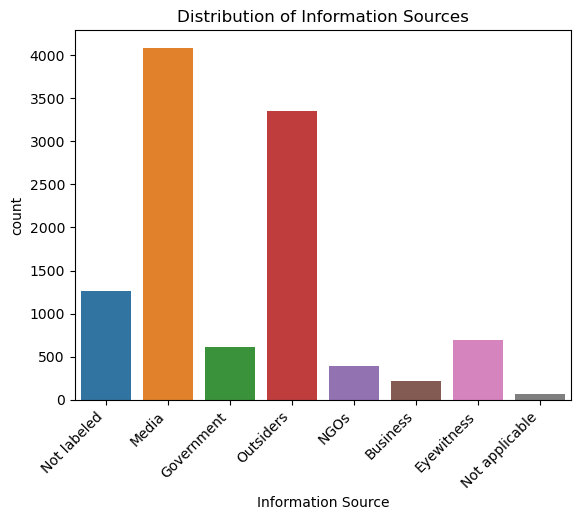

In [19]:
sns.countplot(x='Information Source', data=data)
plt.title('Distribution of Information Sources')
plt.xticks(rotation=45, ha='right')
plt.show()

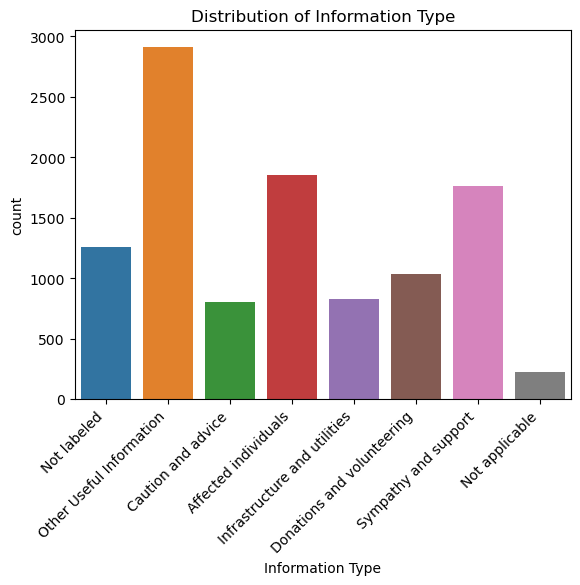

In [21]:
sns.countplot(x='Information Type', data=data)
plt.title('Distribution of Information Type')
plt.xticks(rotation=45, ha='right')  
plt.show()

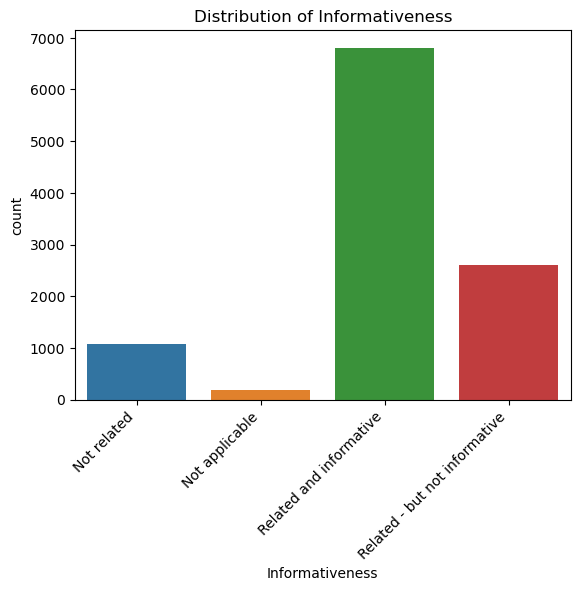

In [22]:
sns.countplot(x='Informativeness', data=data)
plt.title('Distribution of Informativeness')
plt.xticks(rotation=45, ha='right')  
plt.show()

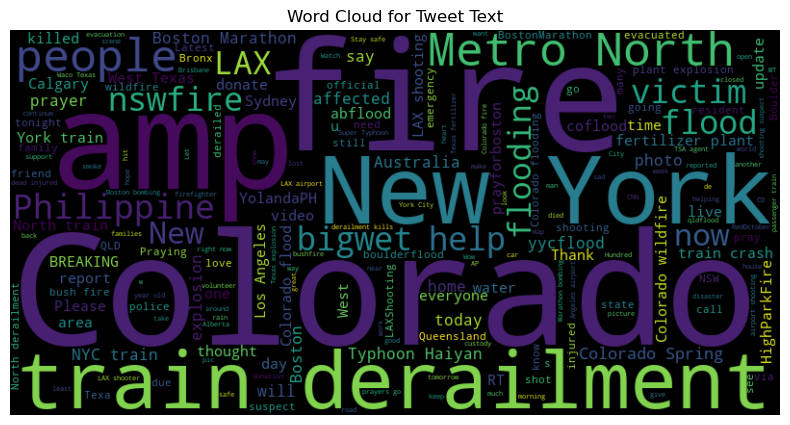

In [25]:
text_corpus = ' '.join(data["Removed RT-Links"])
cloud = wordcloud.WordCloud(width=800, height=400, random_state=42).generate(text_corpus)

plt.figure(figsize=(10, 5))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Tweet Text')
plt.show()

/root/anaconda3/envs/nlp_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


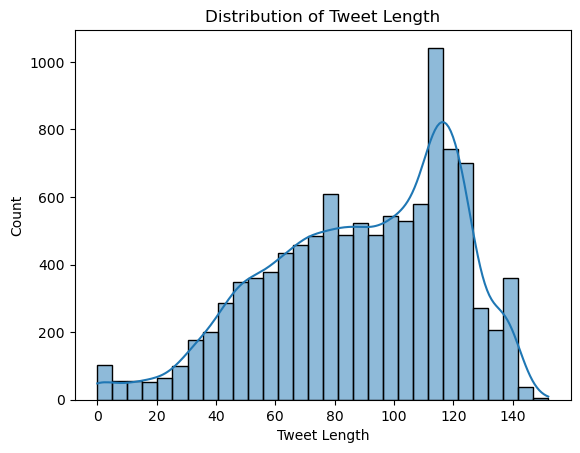

In [28]:
data['tweet_length'] = data['Removed RT-Links'].apply(len)
sns.histplot(data['tweet_length'], bins=30, kde=True)
plt.title('Distribution of Tweet Length')
plt.xlabel('Tweet Length')
plt.show()

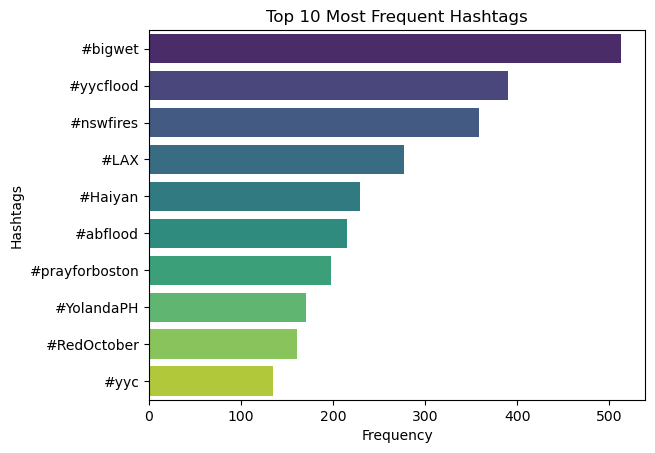

In [29]:
hashtags = data['Removed RT-Links'].str.findall(r'#\w+').explode().value_counts().nlargest(10)
sns.barplot(x=hashtags.values, y=hashtags.index, palette='viridis')
plt.title('Top 10 Most Frequent Hashtags')
plt.xlabel('Frequency')
plt.ylabel('Hashtags')
plt.show()